In [1]:
import jax.numpy as jnp
f = lambda x: jnp.abs(x) + jnp.sin(x)


In [2]:
from jax import grad

In [3]:
df = grad(f)

In [4]:
df(1.)

2023-02-04 07:39:43.802730: W external/org_tensorflow/tensorflow/compiler/xla/service/platform_util.cc:200] unable to create StreamExecutor for CUDA:0: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 15634661376


DeviceArray(1.5403023, dtype=float32, weak_type=True)

In [7]:
#この引数をスカラーから行列にしたい

In [10]:
xv = jnp.linspace(-10,10,100)

In [11]:
from jax import vmap

In [12]:
dfv = vmap(grad(f))


In [13]:
dfv(xv)

DeviceArray([-1.83907151e+00, -1.93116498e+00, -1.98538423e+00,
             -1.99952459e+00, -1.97301078e+00, -1.90692091e+00,
             -1.80394387e+00, -1.66826701e+00, -1.50540996e+00,
             -1.32199538e+00, -1.12548494e+00, -9.23869789e-01,
             -7.25351453e-01, -5.38004160e-01, -3.69447410e-01,
             -2.26538241e-01, -1.15088105e-01, -3.96304727e-02,
             -3.23444605e-03, -7.38042593e-03, -5.18995523e-02,
             -1.34981871e-01, -2.53246844e-01, -4.01885211e-01,
             -5.74851394e-01, -7.65109062e-01, -9.64921534e-01,
             -1.16615975e+00, -1.36064065e+00, -1.54045248e+00,
             -1.69828224e+00, -1.82771051e+00, -1.92347252e+00,
             -1.98167408e+00, -1.99994719e+00, -1.97754896e+00,
             -1.91539025e+00, -1.81599975e+00, -1.68341899e+00,
             -1.52304196e+00, -1.34139049e+00, -1.14585316e+00,
             -9.44383979e-01, -7.45176435e-01, -5.56334496e-01,
             -3.85536492e-01, -2.3973220

In [14]:
import matplotlib.pyplot as plt

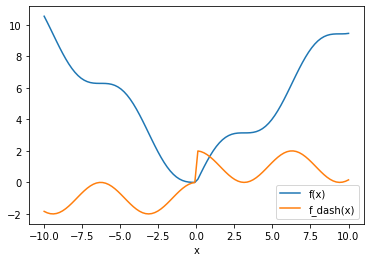

In [16]:
plt.plot(xv,f(xv),label='f(x)')
plt.plot(xv,dfv(xv),label="f_dash(x)")
plt.xlabel('x')
plt.legend()

In [18]:
g = lambda x,y,z: jnp.sqrt(x**2+2*y**2+3*z**2)
dgdx = grad(g,argnums=0)
dgdx(1.,1.,1.)

DeviceArray(0.40824828, dtype=float32, weak_type=True)

In [19]:
dgdr = grad(g,argnums=(0,1,2))

In [20]:
dgdr(1.,1.,1.)

(DeviceArray(0.40824828, dtype=float32, weak_type=True),
 DeviceArray(0.81649655, dtype=float32, weak_type=True),
 DeviceArray(1.2247448, dtype=float32, weak_type=True))

In [21]:
xv = jnp.linspace(-10,10,100)

In [24]:
dgdrv = vmap(grad(g,argnums=(0,1,2)),(0,None,None),0)

In [25]:
dgdrv(xv,1.,1.)

(DeviceArray([-0.97590005, -0.9749335 , -0.9739083 , -0.97281986,
              -0.9716629 , -0.97043157, -0.9691194 , -0.9677196 ,
              -0.966224  , -0.96462417, -0.96291   , -0.9610708 ,
              -0.95909417, -0.95696664, -0.9546729 , -0.9521952 ,
              -0.94951445, -0.9466081 , -0.9434511 , -0.9400147 ,
              -0.9362662 , -0.9321681 , -0.9276773 , -0.92274445,
              -0.91731215, -0.9113145 , -0.90467465, -0.89730316,
              -0.88909614, -0.8799316 , -0.86966735, -0.8581362 ,
              -0.845142  , -0.8304548 , -0.8138053 , -0.7948786 ,
              -0.77330893, -0.7486742 , -0.72049356, -0.6882287 ,
              -0.65129256, -0.60906863, -0.5609486 , -0.50638884,
              -0.44499433, -0.37662163, -0.3014975 , -0.22031564,
              -0.13429159, -0.04512728,  0.04512701,  0.13429159,
               0.22031564,  0.3014973 ,  0.37662187,  0.44499415,
               0.50638884,  0.5609485 ,  0.60906863,  0.65129244,
          

In [32]:
f = lambda x,y: jnp.dot(x **2 ,y)

In [33]:
x = jnp.linspace(0,1,11)
y = jnp.linspace(1,2,11)

In [34]:
f(x,y)

DeviceArray(6.875, dtype=float32)

In [35]:
X = jnp.linspace(0,1,55).reshape(5,11)

In [42]:
vmap(grad(f,argnums=0),(0,None))(X,y)

DeviceArray([[0.        , 0.04074074, 0.08888889, 0.14444444, 0.20740743,
              0.2777778 , 0.35555556, 0.44074073, 0.5333333 , 0.6333334 ,
              0.7407408 ],
             [0.4074074 , 0.4888889 , 0.5777778 , 0.67407405, 0.77777785,
              0.8888889 , 1.0074074 , 1.1333334 , 1.2666667 , 1.4074075 ,
              1.5555556 ],
             [0.8148148 , 0.9370371 , 1.0666667 , 1.2037036 , 1.3481482 ,
              1.5       , 1.6592592 , 1.825926  , 2.        , 2.1814816 ,
              2.3703704 ],
             [1.2222222 , 1.3851851 , 1.5555557 , 1.7333333 , 1.9185187 ,
              2.1111112 , 2.3111112 , 2.5185187 , 2.7333333 , 2.9555557 ,
              3.1851852 ],
             [1.6296296 , 1.8333334 , 2.0444446 , 2.2629628 , 2.488889  ,
              2.7222223 , 2.9629629 , 3.2111113 , 3.4666667 , 3.7296298 ,
              4.        ]], dtype=float32)

In [41]:
vmap(grad(f,argnums=0),(0,None),0)(X,y)

DeviceArray([[0.        , 0.04074074, 0.08888889, 0.14444444, 0.20740743,
              0.2777778 , 0.35555556, 0.44074073, 0.5333333 , 0.6333334 ,
              0.7407408 ],
             [0.4074074 , 0.4888889 , 0.5777778 , 0.67407405, 0.77777785,
              0.8888889 , 1.0074074 , 1.1333334 , 1.2666667 , 1.4074075 ,
              1.5555556 ],
             [0.8148148 , 0.9370371 , 1.0666667 , 1.2037036 , 1.3481482 ,
              1.5       , 1.6592592 , 1.825926  , 2.        , 2.1814816 ,
              2.3703704 ],
             [1.2222222 , 1.3851851 , 1.5555557 , 1.7333333 , 1.9185187 ,
              2.1111112 , 2.3111112 , 2.5185187 , 2.7333333 , 2.9555557 ,
              3.1851852 ],
             [1.6296296 , 1.8333334 , 2.0444446 , 2.2629628 , 2.488889  ,
              2.7222223 , 2.9629629 , 3.2111113 , 3.4666667 , 3.7296298 ,
              4.        ]], dtype=float32)

In [43]:
u = lambda x: jnp.log(1.0 + x)

In [44]:
def ARA(xarr):
    den = vmap(grad(grad(u)))
    bun = vmap(grad(u))
    return -den(xarr)/bun(xarr)

In [45]:
def RRA(xarr):
    den = vmap(grad(grad(u)))
    bun = vmap(grad(u))
    return -den(xarr) / bun(xarr) * xarr

In [46]:
x = jnp.linspace(0,3,100)

(0.0, 3.0)

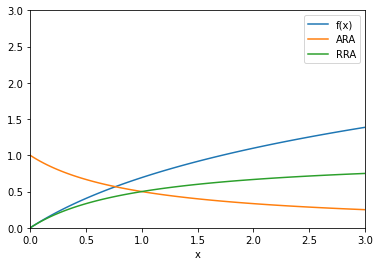

In [47]:
plt.plot(x,u(x),label='f(x)')
plt.plot(x,ARA(x),label='ARA')
plt.plot(x,RRA(x),label='RRA')
plt.legend()
plt.xlabel('x')
plt.xlim(0.,3.)
plt.ylim(0,3)

In [48]:
from jax.lax import scan
from jax import grad

In [49]:
def f(x,null):
    x = 1.0/(1.0 + x)
    return x,null

In [50]:
def g(x0):
    x,null = scan(f,x0,None,3)
    return x

In [51]:
from jax import vmap
from jax import jit
h = jit(vmap(grad(g)))
xarr = jnp.linspace(0,1,100)
harr = h(xarr)

In [52]:
def g(y,x):
    y = y*x + 1.0/x
    return y,None


In [53]:
@jit
def f(xs):
    y0 = 1.0
    y,null = scan(g,y0,xs)
    return y


In [54]:
from functools import partial

In [55]:
class fcjax:
    def __init__(self,c,n):
        self.c = c
        self.n = n
        
    def f(self,x,null):
        x = self.c/(self.c + x)
        return x,null
    
    @partial(jit,static_argnums=(0,))
    def g(self,x0):
        x,null = scan(f,x0,None,self.n)
        return x
    
    @partial(jit,static_argnums=(0,))
    def h(self,x0):
        hh = vmap(grad(self.g))
        return hh(x0)
    
    
    